<a href="https://colab.research.google.com/github/andrerubeis/My-Projects/blob/main/Academic%20Projects/Network%20Dynamics/Homeworks/HW3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3

During the fall of 2009 there was a large pandemic of the H1N1-virus, commonly known as the swine-flu. During this pandemic it is estimated that about 1.5 million people in Sweden were infected. As an attempt to stop the pandemic and reduce excess mortality the government issued a vaccination program beginning in week 40 of 2009. During the weeks that followed they vaccinated more than 60% of the Swedish population. In this homework, you will simulate the pandemic with the goal of learning the network-structure characteristics and disease-dynamics parameters of the pandemic in Sweden 2009.
This task will be divided into 4 parts where the focus of each part is to:



1.  get started and learn how to:
*   simulate a pandemic on a known graph 
*   generate a random graph;
2.   simulate the disease propagation on a random graph without vaccination;
3.   simulate disease propagation on a random graph with vaccination;
4. estimate the network-structure characteristics and disease-dynamics parameters for the pandemic in Sweden during the fall of 2009.

All numbers regarding the H1N1 pandemic in Sweden during the fall of 2009 have been taken from the a report by the Swedish Civil Contingencies Agency (Myndigheten for samhallsskyddoch beredskap, MSB) and the Swedish Institute for Communicable Disease Control (Smittskyddsinstitutet, SMI).



##**1.   Preliminary Parts**
As a warm-up exercise we will start off by doing two preliminary parts. The first one will involve simulating an epidemic on a given graph, while the second part will be to generate a random graph with preferential attachment.



###**1.1. Epidemic on a known graph**
In this part you will simulate an epidemic on a symmetric k-regular undirected graph with node set $\mathcal{V}$ = {1; ... ; n} where every node is directly connected to the $k = 4$ nodes whose index is closest to their own modulo $n$. See Figure $1$ for an example with $8$ nodes. The graph that you will simulate the epidemic on will however contain $n = 500$ nodes.

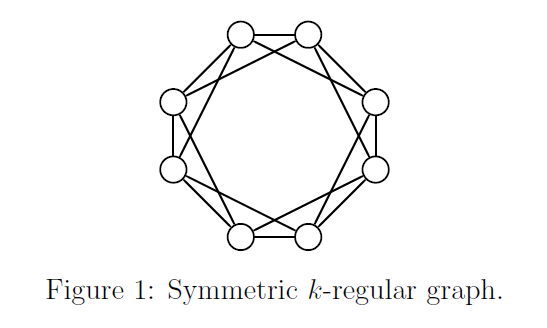

The disease propagation model that you will use to simulate the epidemic is a discrete-time simplified version of the SIR epidemic model. At any time $t = 0, 1, ...$ nodes are in state $X_i(t) \in \{S, I, R\}$, where $S$ is susceptible, $I$ is infected and $R$ is recovered. Let $β \in [0, 1]$ be the probability that the infection is spread from an infected individual to a susceptible one
(given that they are connected by a link) during one time step. Assuming that a susceptible node $i$ has $m$ infected neighbors, this means that the probability that individual $i$ does not get infected by any of the neighbors during one time step is $(1-𝛽)^m$. Thus, the probability that individual $i$ becomes infected by any of its neighbors is $1 - (1 - 𝛽)^m$. Furthermore, let
$ρ \in [0, 1]$ be the probability that an infected individual will recover during one time step.
The epidemic is driven by the following transition probabilities.

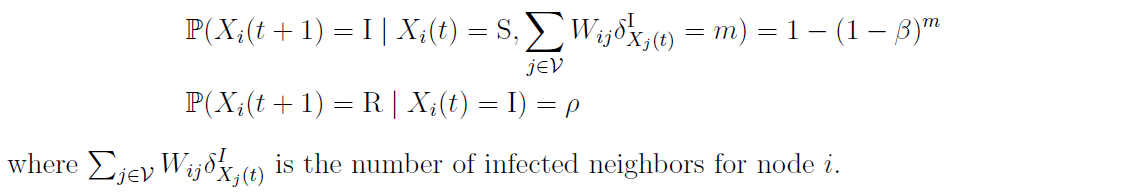

####**Problem 1.1**

You should simulate an epidemic on a symmetric $k$-regular graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ with $|\mathcal{V}| = 500$ nodes and $k = 4$. See Figure 1 for an example with $n = 8$ nodes. Let $𝛽 = 0.3$
and $ρ = 0.7$. With one week being one unit of time, simulate the epidemic for $15$ weeks. You can choose an initial configuration with $10$ infected nodes selected at random from the node set $\mathcal{V}$, or make a dierent choice of initial configuration (in the latter case, please briefly
discuss your motivation).

Do this $N = 100$ times and plot the following:

*   **The average number of newly infected individuals each week**. In other words, you should plot how many people *become* infected each week (on the average).
*   **The average total number of susceptible, infected, and recovered individuals at each week**. In other words, you should plot how many individuals *in total that are* susceptible/infected/recovered at each week (on the average)

.
**Hint**: Since we use a fairly large amount of nodes for this simulation it is a good idea to use sparse matrices for this and the following problems.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_infected(susceptible, infected, G, rho, beta):
    #The function receives 2 nodes, one infected and one susceptible,
    #we take check if among the neighbors of the susceptible node are
    #also some nodes infected and we count them by using m, then
    #according to the homework the probability to get infected is
    # 1- (1-p)**m. The susceptible node will be infected (0) with 
    #probability p and not infected with probability 1-p
    
    neighbors = G.neighbors(susceptible)
    neighbors_infected = list(set(infected).intersection(neighbors))
    m = len(neighbors_infected)
    prob_infected = 1 - (1 - beta)**m
    ris = np.random.choice(2, p=[prob_infected, 1 - prob_infected])
    if(ris == 0):
        return True
    else:
        return False

In [3]:
def get_recovered(node, G, rho, beta):
    #According to the homework the probability
    #to get recovered is rho and we generate a random
    #treshold above which the node will be recovered
     
    prob_recovered = rho
    if(prob_recovered > np.random.rand()):
        return True
    else:
        return False

In [4]:
def averages_newly_infected_and_sir_week(G, n_nodes, N, n_infected, n_weeks, rho, beta, vac_flag = False, vac_list_origin = None, I_real=[]):
  #G: graph
  #n_nodes: nodes of the graph
  #n_infected: initial number of infected
  #n_weeks: number of weeks simulated
  #rho: probability of get recovered
  #beta: probabilty of get infected
  #vac_flag: flag used to handle point 3 and 4
  #vac_list origin: contains the differences between the number of people vaccined
  #                 from one week to another (ex. [5, 10, 17] - > [5, 5, 7])
  #I_real: list needed for point 4, null by default



  #We need to compute the average number of newly infected individuals each week
  #and the average total number of susceptible, infected and recovered
  #So we use the lists n_inf (to count at each week how many new infected are
  #recorded) and inf, rec, susc lists to count how many   

  new_inf_list = [] 
  new_vac_list = [] 

  inf_list= []      
  rec_list = []     
  susc_list = []    
  vac_list = []     

  #Simulate 100 times and at each time choose 10 infected nodes randomly among 500
  #without replacement (replace = False)
  
  for t in range(N): 
      
    #Build three sets: 10 infected, recovered at the beginning is empty
    #and susceptible at each simulation then we have vaccinable who are
    #the agents potentially vacinable so at the beginning they are all the nodes
    #and vaccined who are people already vaccined (none at the beginning)
    
    
    infected = set(np.random.choice(n_nodes, n_infected, replace = False)) 
    recovered = set()                                                      
    susceptible =  set(G.nodes) - set(infected) - set(recovered)           
    vaccined = set()                                                       
    vaccinable = set(range(n_nodes))                                       

    #Needed for point 4: we don't know the new number of infected at this time
    #but just the next iteration and I append 1 in order to have a loss = 0   
    if I_real != []:
      new_inf_list.append(1)


    #Given this initial state, we simulate for 15 weeks
    for week in range(n_weeks): 

      #To take track abou new infected and recovered at each week we use lists
      #the following lists
      
      new_infected = []     
      new_recovered = []    

      #We use a flag variable to easily handle epidemic cases both with and 
      #without vaccine

      if vac_flag==True:

        #Retreive the number v of agents that must be vaccinated
        #print(n_nodes, week, N, vac_list)
        
        n_vaccinated = int(n_nodes * vac_list_origin[week]/100)
        n_vaccinated = min(n_vaccinated, len(vaccinable) )

        #who are the agents that will be vaccinated by randomly extracting v
        #agents without replacement 
        new_vaccinated =  np.random.choice(list(vaccinable), 
                                           size = n_vaccinated, replace = False)
        
        susceptible = set(susceptible) - set(new_vaccinated) 
        infected = set(infected) - set(new_vaccinated)
        vaccined = set(vaccined).union( set(new_vaccinated) )
        
      #we check if among susceptibles there may be new infected and among
      #infected if some of them had recovered
      for agent in susceptible:
        if( get_infected(agent, infected, G, rho, beta) ):
          new_infected.append(agent)
      for agent in infected:
        if( get_recovered(agent, G, rho, beta)):
          new_recovered.append(agent)

      #Update lists          
      new_inf_list.append(len(new_infected)) 
      
      if vac_flag == True:
        new_vac_list.append(len(new_vaccinated))

      inf_list.append(len(infected))
      rec_list.append(len(recovered))
      susc_list.append(len(susceptible))
      vac_list.append(len(vaccined))

      #Update
      infected = infected.union( set(new_infected) ) - set(new_recovered) 
      recovered = recovered.union( set(new_recovered) )
      susceptible =  set(susceptible) - set(new_infected) - set(new_recovered)

      if vac_flag == True:
        vaccinable = set(vaccinable) - set(new_recovered) - set(new_vaccinated)
        vaccined = set(vaccined).union( set(new_vaccinated) ) #non in SIRV
  
  if I_real!=[]: #point 4: 1.c compute the loss
    x = np.mean(np.reshape(new_inf_list, (N,16)), axis = 0)
    average_new_infected = np.array(x, dtype=int)
    rmse  = np.sqrt(1/15* np.sum((average_new_infected - I_real)**2))
  else:
    rmse = 0
    average_new_infected = None #otherwise does not work in points 1-2-3
      
  return new_inf_list, new_vac_list, inf_list, rec_list, susc_list, vac_list, rmse, average_new_infected

In [5]:
def plot_averages(n_inf, inf, rec, susc, N, n_weeks, vac = None, n_vac = [], i_real = False):
  
  #Since in averages_newly_infected_and_sir_week function we simulate N times
  #for n_weeks, to retrieve the average of newly infected, infected,
  #recovered and susceptible we rehsape the lists we got in matrixes of size
  #Nxn_weeks and average along the rows so we got final list of n_weeks elements
  #in which each element correpsonds to the avereage quantity x for that week
  
  fig = plt.figure(figsize=(8,5), dpi=100)

  average_new_infected = np.mean(np.reshape(n_inf, (N,n_weeks)), axis = 0)

  average_infected = np.mean(np.reshape(inf, (N,15)), axis = 0)
  average_recovered = np.mean(np.reshape(rec, (N,15)), axis = 0)
  average_susceptible = np.mean(np.reshape(susc, (N,15)), axis = 0)
  if(vac is not None):
      average_new_vaccined = np.mean(np.reshape(n_vac, (N,15)), axis = 0)
      average_vaccined = np.mean(np.reshape(vac, (N,15)), axis = 0)
      
  #Plot averages
  plt.plot(range(n_weeks),average_new_infected, linestyle='-', marker='o', label ='average new infected')
  if vac is not None and i_real == False:
    plt.plot(range(15),average_new_vaccined, linestyle='-', marker='o', color = 'red', label ='average new vaccined')
  plt.legend()
  plt.grid(True)
  plt.title("The average number of newly infected individuals each week")
  plt.show()

  fig = plt.figure(figsize=(8,5), dpi=100)
  plt.plot(range(15),average_infected, linestyle='-', marker='o', label ='Average Infected')
  plt.plot(range(15),average_susceptible, linestyle='-', marker='o', label ='Average Susceptible')
  plt.plot(range(15),average_recovered, linestyle='-', marker='o', label ='Average Recovered')
  if(vac is not None):    
      plt.plot(range(15),average_vaccined, linestyle='-', marker='o', label ='Average Vaccined')
  plt.legend()
  plt.grid(True)
  plt.title("The average total number of susceptible, infected, and recovered individuals at each week")
  plt.show()


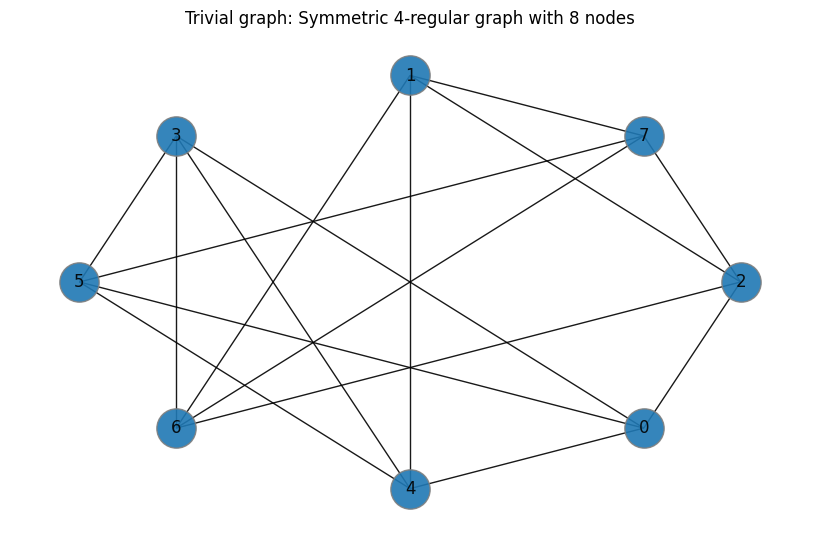

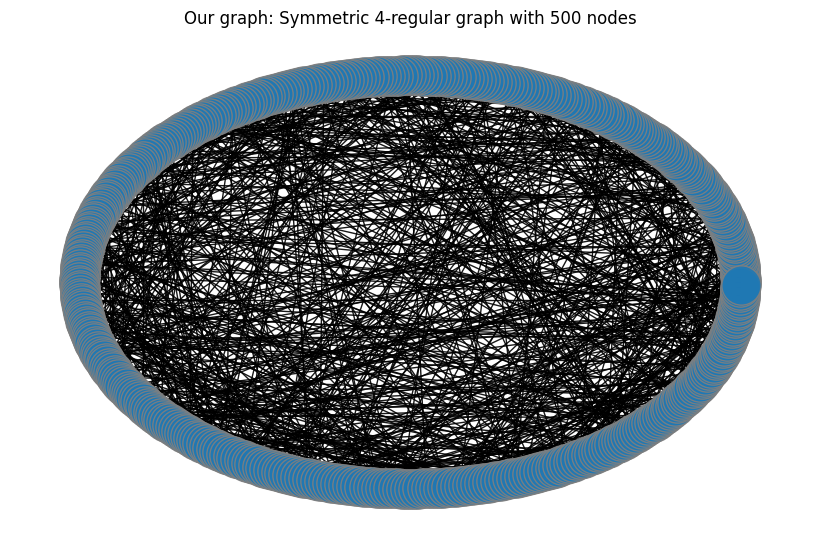

In [6]:
n = 500
k = 4

beta = 0.3
rho = 0.7
n_weeks = 15
N = 100
n_infected = 10

#To construct the symmetric regular graph we use a function of nx already
#implemented which receives the degree of each node (k) and the cardinality of 
#the node set (n). We construct the trivial graph T with 8 nodes and our graph
#G with 500 nodes, both with k = 4

G = nx.random_regular_graph(k, n)
T = nx.random_regular_graph(k, 8)

#Draw the graph
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}

#Trivial graph
fig = plt.figure(figsize=(8,5), dpi=100)
nx.draw_circular(T, with_labels=True, **options)
plt.title(f"Trivial graph: Symmetric {k}-regular graph with 8 nodes")
plt.show()

#Our graph
fig = plt.figure(figsize=(8,5), dpi=100)
nx.draw_circular(G, **options)
plt.title(f"Our graph: Symmetric {k}-regular graph with {n} nodes")
plt.show()


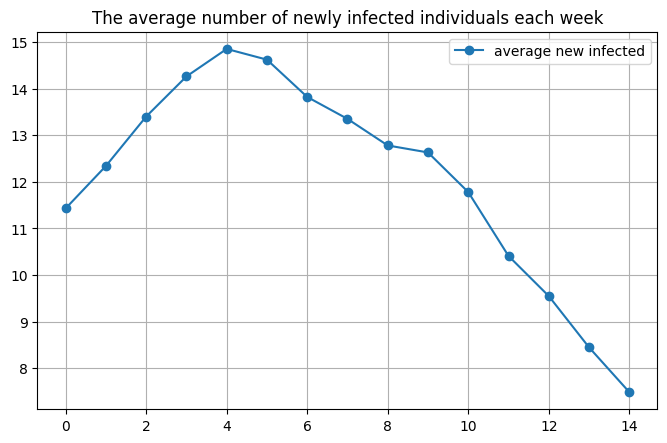

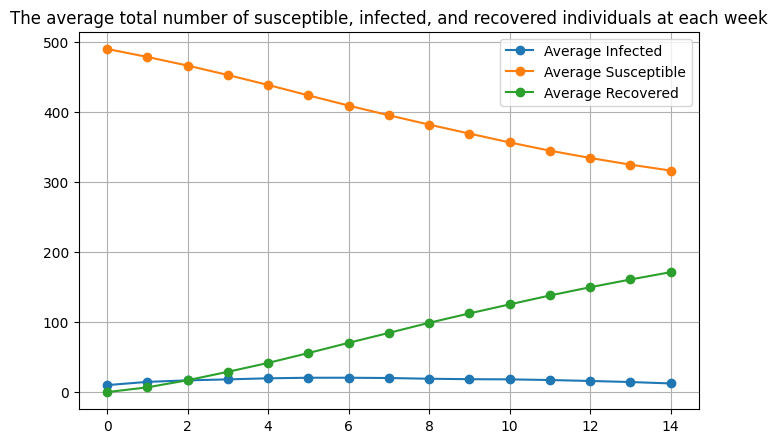

In [7]:
#Neglect new vaccinated, vaccinated, loss and average_new_infected. The first 2 are needed at point 3 while last two are needed just for point 4
new_infected, _, infected, recovered, susceptible, _, _, _ = averages_newly_infected_and_sir_week(G, n, N, n_infected, n_weeks, rho, beta, vac_flag=False, I_real=[])
plot_averages(new_infected, infected, recovered, susceptible, N, n_weeks, vac = None)

###**1.2   Generate a random graph**
In this part you will generate a random graph according to the preferential attachment model.
The goal is to have a randomly generated graph with average degree close to $k$. The idea is the following: at time $t = 1$ we start with an initial graph $\mathcal{G_1}$, that is *complete* with $k + 1$
nodes. Then at every time $t \geq 2$, create a new graph $\mathcal{G_t} = (\mathcal{V_t}; \mathcal{E_t})$ by adding a new node
to $\mathcal{G_{t-1}}$ and connect it to some of the existing nodes $\mathcal{V_{t-1}}$ of $\mathcal{G_{t-1}}$ chosen according to some
stochastic rule.

The rule by which the new node add links to the nodes of $\mathcal{G_{t-1}}$ is *preferential attachment*.
This means that at every time-step $t \geq 2$, every new node added at time $t$ will have a degree $w_t(t) = c = k/2$. Hence, it should add $c$ undirected links to the existing graph $\mathcal{G_{t-1}}$. It decides which of the nodes in $\mathcal{V_{t-1}}$ it should connect to based on some probability that is
proportional to the current degree of the node it is connecting to. In other words, if we denote the new node $n_t$, the probability that there will be a link between node $n_t$ and node $i \in \mathcal{V_{t-1}}$ is:

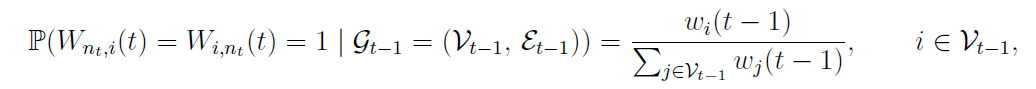


where $W(t)$ is the adjacency matrix for the next time-step $t$ and $w_i(t-1)$ is the degree of node $i$ prior to adding the new node. Some care should be taken here so that you do not add multiple links to the same node.

You should also note that if $k$ is odd, it is a bit trickier to generate the random graph such that the average degree will be $k$. If k happens to be an odd number, then $c = k=2$ will not be an integer. However, it is still possible to achieve an average degree of $k$ when you add a large number of nodes. This can be done by alternating between adding $\lfloor k/2\rfloor$ and $\lceil k/2 \rceil$ links when adding a new node to the graph.

####**Problem 1.2**
Your goal is to, by using preferential attachment, generate a random graph
of a large size (at least $900$ nodes) with average degree $k \in 𝛧^+$. Let the initial graph $\mathcal{G_1} = (\mathcal{V_1}; \mathcal{E_1})$ be a complete graph with $|\mathcal{V_1}| = k_0 = k + 1$ nodes.

Note that the goal here is to implement a fairly general algorithm where it is very easy to change the average degree. It should be possible to change the average degree by only changing the value of $k$ in your algorithm. This algorithm will then be used in Section $4$.

In [8]:
def create_random_graph(k, n_final_nodes):

    #Create initial complete graph G of k+1 nodes 
    G = nx.complete_graph(k + 1)

    #Degree of the node to add at time t
    c = int(k/2) 

    for i in range(n_final_nodes):
        
        #Write the stochastic rule wi(t-1)/sum(wj(t-1)) 
        w = [val for (node, val) in G.degree()]
        sum_w = sum(w)
        prob_nodes = np.array(w)/sum_w
        
        #New node to add
        new_node = len(G)

        #Choose the c nodes according to the stochastic rule
        sel = np.random.choice(G.nodes, size = c, 
                               replace = False, p=list(prob_nodes))

        #Add the edge
        G.add_edges_from([(new_node, el) for el in sel])
    return G,k

In [9]:
G, average_degree = create_random_graph(6, 1000)
print("Average degree: ", average_degree)

Average degree:  6


##**2. Simulate a Pandemic without vaccination**

In this part you will be using the graph generated in Section $1.2$ and then simulate an epidemic on it. The disease propagation model is again the discrete-time version of the SIR epidemic model used in Section $1.1$

####**Problem 2**
Using the methods developed in Section 1, generate a preferential attachment random graph $\mathcal{G} = (\mathcal{V}; \mathcal{E})$, with $|\mathcal{V}| = 500$ nodes. The average degree should be $k = 6$. Let
$β = 0.3$ and $ρ = 0.7$. With one week being one unit of time, simulate the epidemic for $15$ weeks. You can choose an initial configuration with $10$ infected nodes selected at random from the node set $\mathcal{V}$, or make a different choice of initial configuration (in the latter case, please briefly discuss your motivation).

Do this $N = 100$ times and plot the following:
*   **The average number of newly infected individuals each week**. In other words, you should plot how many individuals *become* infected each week.
*   **The average total number of susceptible, infected, and recovered individuals at each week**. In other words, you should plot how many individuals *in total that are* susceptible/infected/recovered at each week.

**Hint**: Remember to continue using sparse matrices for this and following problems.


In [10]:
k = 6
n = 500
G, avg_deg = create_random_graph(k, n)
beta = 0.3
rho = 0.7
n_weeks = 15

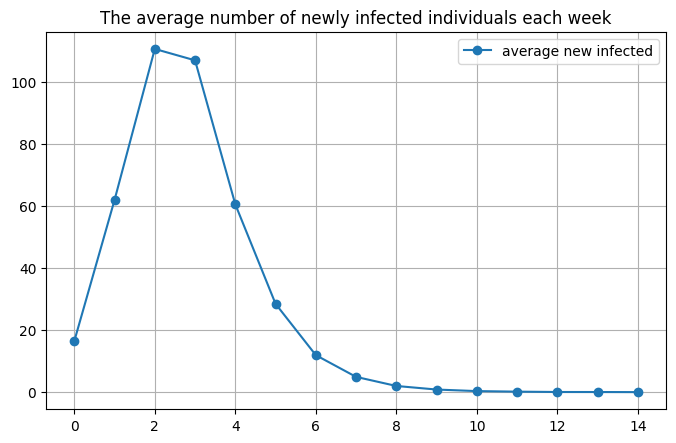

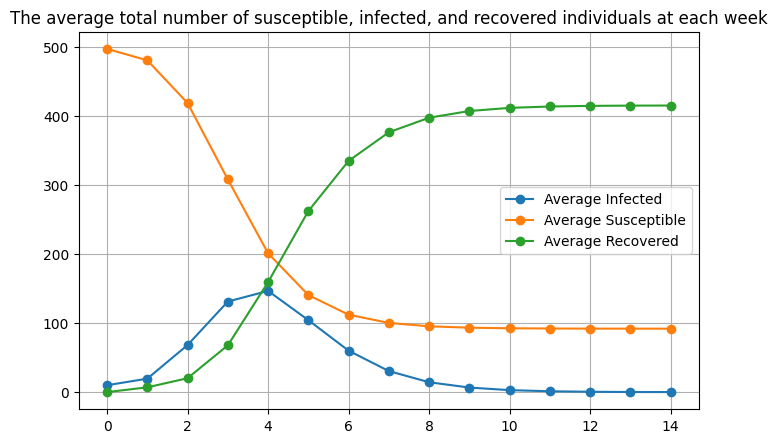

In [11]:
#Neglect new vaccinated, vaccinated, loss and average_new_infected. The first 2 are needed at point 3 while last two are needed just for point 4
new_infected, _, infected, recovered, susceptible, _, _ , _= averages_newly_infected_and_sir_week(G, n, N, n_infected, n_weeks, rho, beta, vac_flag=False)
plot_averages(new_infected, infected, recovered, susceptible, N, n_weeks, vac = None)
plt.show()

##**3. Simulate a Pandemic with vaccination**


In this part you will essentially do the same thing as before, but you will also try to take some action to slow down the epidemic. This is normally done using vaccination. Therefore, during each week, some parts of the population will receive vaccination. *Once a person is vaccinated it cannot be infected*. Furthermore, *the vaccination is assumed to take effect immediately once*
given, i.e. if person a is vaccinated in week $10$, then a is no longer susceptible during that week, and can therefore not infect any other individual.

You should once again simulate the disease propagation for 15 weeks, but you should now also distribute vaccination to the population. This should be done such that the total fraction of population that has received vaccination by each week is according to:

$Vacc(t)=[0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60]$

$Vacc(t)$ should be interpreted as $55\%$ of the population has received vaccination *by* week $7$, and $5\%$ recevied vaccination *during* week $7$.

To simulate the actual vaccination you should, at the beginning of each week, find the correct number of individuals to vaccinate according to $Vacc(t)$. You should then find individuals to vaccinate. These individuals should be selected uniformly at random from the population that *has not yet received vaccination*. This means that *an infected individual might receive vaccination as well*. The reason behind this is that some people were not able to tell whether they had the H1N1-virus or just the common cold. If an infected individual becomes vaccinated it is assumed that she will not be able to infect another individual. In other words, we assume that regardless of the state of an individual prior to the vaccination, *once vaccinated the individual will not be able to become infected nor infect any other individuals.*

####**Problem 3**
Using the method developed in the previous section, generate a random graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ with $|\mathcal{V}|=500$ nodes. The average degree should be $k=6$. Let $β=0.3$ and $\rho=0.7$. With one week being one unit of time, simulate the epidemic *with vaccination* for $15$ weeks, using the vaccination scheme $Vacc(t)$ above. You can choose an initial configuration with $10$ infected nodes selected at random from the node set $\mathcal{V}$ or make a different choice of initial configuration (in the latter case, please briefly discuss your motivation).

Do this $N = 100$ times and plot the following:


*   **The average number of *newly infected* and *newly vaccinated* individuals each week**
*   **The average total number of susceptible, infected, recovered and vaccinated individuals at each week**.



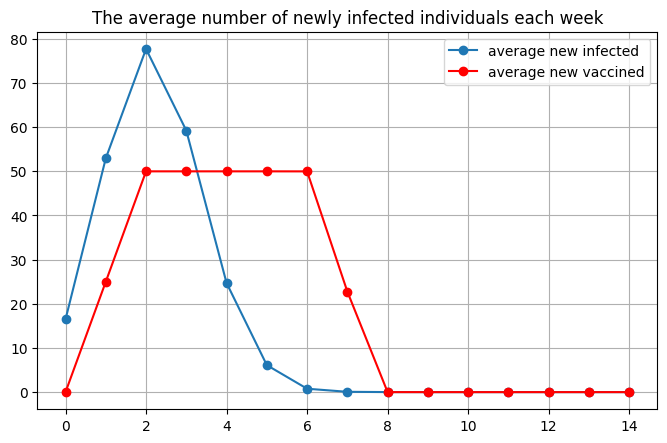

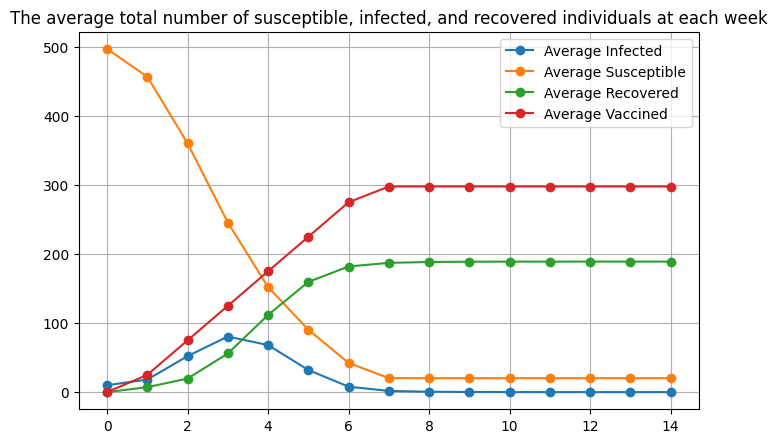

In [12]:
#Graph G is the same of previous point obtained by the function create_random_graph
#with n = 500 and k = 6
n = 500
beta = 0.3
rho = 0.7
n_weeks = 15

vac_list_cumulative = [0,5,15,25,35,45,55,60,60,60,60,60,60,60,60]
vac_list_weeks = [vac_list_cumulative[i] if i == 0 else vac_list_cumulative[i] - vac_list_cumulative[i-1]  for i in range(0, n_weeks)]
#vac_list_weeks = [0, 5, 10, 10, 10, 10, 10, 5, 0, 0, 0, 0, 0, 0, 0]

new_infected, new_vaccinated, infected, recovered, susceptible, vaccinated, _, _ = averages_newly_infected_and_sir_week(G, n, N, n_infected, n_weeks, rho, beta,
                                                                                                                                           vac_flag=True, 
                                                                                                                                           vac_list_origin = vac_list_weeks)
plot_averages(new_infected, infected, recovered, susceptible, N, n_weeks, 
              vac = vaccinated,
              n_vac = new_vaccinated)
plt.show()


In [13]:
# #We take as best parameters the average of best parameters found at each step
# #of the grad_search function

# best_k = 9
# best_beta = 0.22749999999999998
# best_rho = 0.6112499999999998
# best_loss = 4.603632595724787

# vac_list_weeks = [5, 4, 7, 8, 8, 8, 7, 7, 5, 1, 0, 0, 0, 0, 0, 0]
# real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]

# n = 934
# N = 100
# n_weeks = 15
# n_infected = 1

# #Recompute the average new infected and average infected, susceptible and recovered as done in previous points
# G, avgDegree = create_random_graph(best_k, n)

# new_infected, new_vaccinated, infected, recovered, susceptible, vaccinated, loss, average_new_infected = averages_newly_infected_and_sir_week(G, n, N, n_infected, n_weeks, best_rho, best_beta, vac_flag=True, vac_list_origin=vac_list_weeks, I_real= real_n_inf)
# plot_averages(new_infected, infected, recovered, susceptible, N, 16, vac = vaccinated, n_vac=new_vaccinated, i_real = True)

# plt.plot(range(16),average_new_infected, linestyle='-', marker='o', label ='average new infected')
# print("Loss single istance: ", loss)

##**4. The H1N1 pandemic in Sweden 2009**


In this part you will use all the previous parts in order to estimate the social structure of the Swedish population and the disease-spread parameter during the H1N1 pandemic.
As mentioned before, during the fall of 2009 about $1.5$ million people out of a total population of $9$ million were infected with H1N1, and about $60\%$ of the population received vaccination.
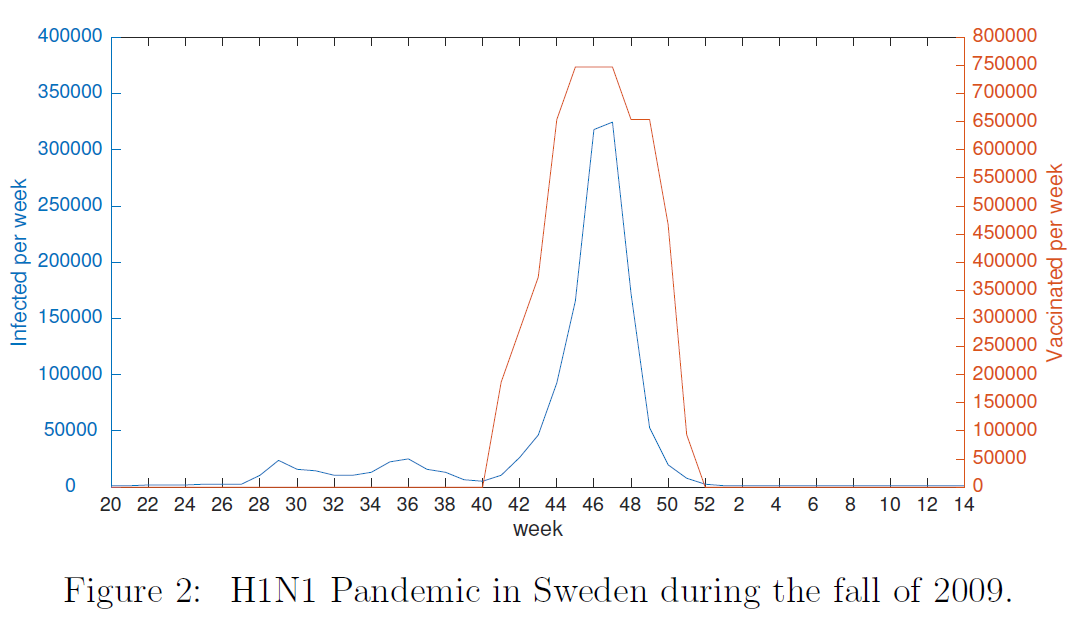

Figure $2$ illustrates the number of newly infected (and vaccinated) individuals each week.
We will simulate the pandemic between week $42$, $2009$ and week $5$, $2010$. During these weeks, the fraction of population that had received vaccination was:

$Vacc(t)=[5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60, 60]$

In order to not spend too much time running simulations, we will scale down the population of Sweden by a factor of $10^4$.

This means that the population during the simulation will be $n = |\mathcal{V}|=934$. For the scaled version, the number of newly infected individuals each week in the period between week $42$, $2009$ and week $5$, $2010$ was:

$I_0(t) = [1,1,3,5,9,17,32,32,17,5,2,1,0,0,0,0]$

The following algorithm will do a gradient-based search over the parameter space of $k$, β and ρ in order to find the set of parameters that best matches the real pandemic.

**Algorithm**: Start with an initial guess of the parameters, $k_0, β_0$ and $ρ_0$ (here one could use $k_0 = 10, β_0 = 0.3, ρ_0=0.6$ as an initial guess) along with some $\Delta k = 1, \Delta β = 0.1$ and $\Delta ρ = 0.1$):



**1.**   For each set of parameters ($k, β, ρ)$ in the parameter-space $k \in \{k_0-\Delta k,k_0, k_0+ \Delta k\}$, $β \in \{β_0-\Delta β,β_0, β_0+ \Delta β\}$ and $ρ \in \{ρ_0-\Delta ρ,ρ_0, ρ_0+ \Delta ρ\}$:

> a.  Generate a random graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ using the preferential attachment model developed in Section 1.2. The average degree should be $k$, and there should be $|V| = 934$ nodes in the graph.

> b. Starting from week $42$, simulate the pandemic for $15$ weeks on $\mathcal{G}$. You should use the method developed in Section 3 with the vaccination scheme described above. Do this $N = 10$ times, and compute the *average* number of newly infected individuals each week, $I(t)$.

> c. Compute the root-mean-square error (RMSE) between the simulation and the real pandemic:

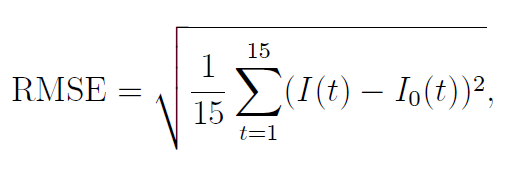

where $I(t)$ is the average number of newly infected individuals each week in the simulation and $I_0(t)$ is the true value of newly infected individuals each week.

**2**.  Update $k_0, β_0, and ρ_0$ to the set of parameters yielding the lowest RMSE. If the result was the same set of parameters, the algorithm should stop.



####**Problem 4**
Using the algorithm above, estimate the average degree $k$ and the disease-spread parameters β and ρ for the pandemic.

Once you have found the best estimate, report what parameters you got. You should also show the following plots:

*   **The average number of *newly infected* individuals each week according to the model (with your best parameters) compared to the true value of newly infected individuals each week.**
*   **The total number of susceptible, infected, recovered and vaccinated individuals at each week according to the model.**

**Hint**: The algorithm will be somewhat slow to execute as it needs to run the method developed in Section 3 multiple times before updating $k_0, \beta_0, \rho_0$.

It might be a good idea to play around with the values of $\Delta k$, $\Delta β$, and $\Delta \rho$. For instance, you can start with large values and then decrease them when you cannot find a better set of parameters (for example, you can reduce them by half).



In [14]:
#FUNCTION NEEDED FOR POINT 5

#For this optimization we try to see what results we got by implementing the 
#Erdos-Renyi model instead of the attachement used in point 1.2

import scipy as sp

def create_Erdos_Renyi(n, k):
  prob = (n*k)/(sp.special.binom(n,2))
  G = nx.erdos_renyi_graph(n, prob, directed=False)
  return G

In [15]:
def grad_search(n, N, n_weeks, vac_list, real_n_inf, k_0, beta_0, rho_0, delta_k_0, delta_beta_0, delta_rho_0, optional = False):
  flag = True
  old_loss = 100

  #We iterate until we improve the loss (rmse)
  while flag:

    #We use a list sol to track all the results we got during the grid search
    sol = []

    #Possible values that k, beta and rho can assume
    ks = [k_0, k_0 + delta_k_0, k_0 - delta_k_0]
    betas = [beta_0, beta_0 + delta_beta_0, beta_0 - delta_beta_0]
    rhos = [rho_0, rho_0 + delta_rho_0, rho_0 - delta_rho_0]

    #Grad search: 3x3 = 27 combinations in total
    for k in ks:
      for beta in betas:
        for rho in rhos:
          
          #1.a Generate the random graph as done in 1.2 with n = 934 and 
          #average degree equal to k 
          if optional == True:
            G = create_Erdos_Renyi(n, k)
          else:
            G, _ = create_random_graph(k, n)

          #1.b Starting with 1 infected, we apply the vaccination scheme as done
          #in point 3 with N=10  times and compute the average number of newly
          #infected individuals each week I(t) (avg_new_I, already reshaped)
          
          n_infected = 1
          new_infected, new_vaccinated, infected, recovered, susceptible, vaccined, loss, avg_new_I = averages_newly_infected_and_sir_week(G, n, N, n_infected, n_weeks, rho, beta, vac_flag=True, vac_list_origin=vac_list, I_real= real_n_inf)

          #Collect the results in sol list
          sol.append([k, beta, rho, loss, avg_new_I])
    
    #Sort the infos in order to have at first position data related to the best loss
    sol.sort( key = lambda x: x[3])
    best_k, best_beta, best_rho, best_loss, best_avg_new_I = sol[0]
    
    #Update
    if(best_k == k_0 and best_beta == beta_0 and best_rho == rho_0):
        print(f"Parameters remained invaried.\nBest combination: k = {best_k}, beta = {round(best_beta,2)}, rho = {round(best_rho,2)} with loss = {best_loss}")
        flag = False  
        return best_k, best_beta, best_rho, best_loss, best_avg_new_I
    elif best_loss > old_loss:
      print(f"Loss increased, previous combination was preferable.\nBest combination: k = {ks[1]}, beta = {round(betas[1],2)}, rho = {round(rhos[1],2)} with loss = {old_loss}")
      #plot_comparison(I_real, best_avg_new_I, weeks, simulations)
      stop = True
      return ks[1], betas[1], rhos[1], old_loss, old_avg_new_I
    else:
        old_loss = best_loss
        old_avg_new_I = best_avg_new_I
        if(best_k != k_0):
            k_0 = best_k
            delta_k_0 = int(delta_k_0 /2)
        if(best_beta != beta_0):
            beta_0 = best_beta
            delta_beta_0 /=2
        if(best_rho != rho_0):
            rho_0 = best_rho
            delta_rho_0 /= 2

In [16]:
n = 934 #population
N = 10 
n_weeks = 15
n_infected = 1

vac_list_cumulative = [5,9,16,24,32,40,47,54,59,60,60,60,60,60,60,60]
vac_list_weeks = [vac_list_cumulative[i] if i == 0 else vac_list_cumulative[i] - vac_list_cumulative[i-1]  for i in range(0, n_weeks)]
#vac_list = [5, 4, 7, 8, 8, 8, 7, 7, 5, 1, 0, 0, 0, 0, 0, 0]

real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]

#initial parameters:
k_0 = 10
beta_0 = 0.3
rho_0 = 0.6
delta_k_0 = 1
delta_beta_0 = 0.1
delta_rho_0 = 0.1

#To have a more relaiable estimate I compute n_grid_search times the estimate
#and then make the average to obtain the average best parameters k, beta, rho
n_grid_search = 10

print(f"Simulate the gradient-based search over the parameter space of  k, β and ρ for {n_grid_search} times.\nThe best k, β and ρ will be the average of the values found at each step.")
print("")

solutions = []
for i in range(n_grid_search):
  print(f"Values found at step {i}:")
  print("")
  solutions.append(grad_search(n, N, n_weeks, vac_list_weeks, real_n_inf, k_0, beta_0, rho_0, delta_k_0, delta_beta_0, delta_rho_0))
  print("")

Simulate the gradient-based search over the parameter space of  k, β and ρ for 10 times.
The best k, β and ρ will be the average of the values found at each step.

Values found at step 0:

Loss increased, previous combination was preferable.
Best combination: k = 9, beta = 0.25, rho = 0.55 with loss = 5.471136384091822

Values found at step 1:

Loss increased, previous combination was preferable.
Best combination: k = 9, beta = 0.25, rho = 0.7 with loss = 3.8384024454626084

Values found at step 2:

Loss increased, previous combination was preferable.
Best combination: k = 11, beta = 0.19, rho = 0.69 with loss = 2.6583202716502514

Values found at step 3:

Loss increased, previous combination was preferable.
Best combination: k = 9, beta = 0.19, rho = 0.58 with loss = 4.509249752822894

Values found at step 4:

Loss increased, previous combination was preferable.
Best combination: k = 9, beta = 0.25, rho = 0.78 with loss = 3.9157800414902435

Values found at step 5:

Parameters remaine

In [17]:
#Show the averages of the best parameters we got
mean_solutions = np.mean(solutions, axis = 0, dtype = object)
mean_solutions

array([9.6, 0.22218749999999998, 0.6234375, 4.012621429557912,
       array([ 1. ,  0.8,  2.4,  6.1, 13.5, 23.2, 28.5, 25.1, 15.8,  8.4,  5. ,
        3. ,  1.4,  1. ,  0.6,  0.3])], dtype=object)

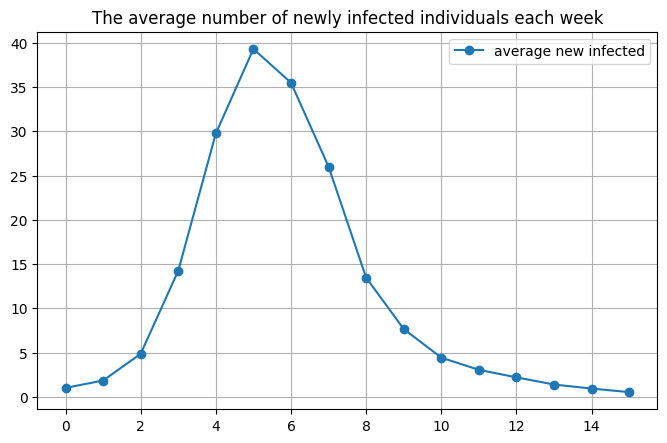

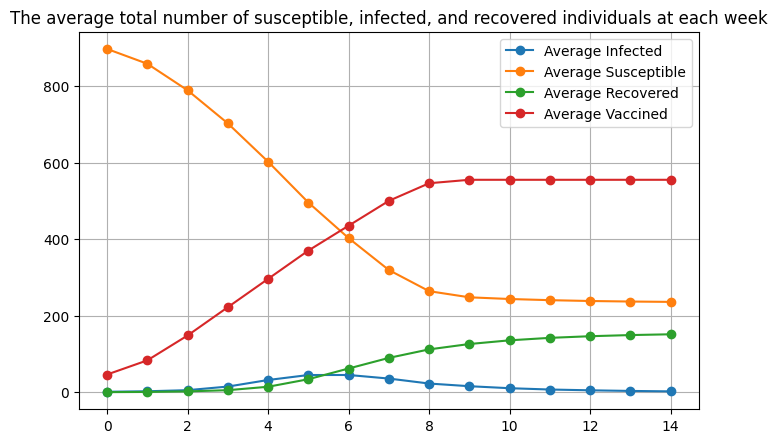

Loss single istance:  8.342661445845684
Best RMSE found:  4.012621429557912


In [18]:
#We take as best parameters the average of best parameters found at each step
#of the grad_search function

best_k = int(mean_solutions[0])
best_beta = mean_solutions[1]
best_rho = mean_solutions[2]
best_loss = mean_solutions[3]

n = 934
N = 100
n_weeks = 15
n_infected = 1

vac_list_cumulative = [5,9,16,24,32,40,47,54,59,60,60,60,60,60,60,60]
vac_list_weeks = [vac_list_cumulative[i] if i == 0 else vac_list_cumulative[i] - vac_list_cumulative[i-1]  for i in range(0, n_weeks)]
#vac_list = [5, 4, 7, 8, 8, 8, 7, 7, 5, 1, 0, 0, 0, 0, 0, 0]

real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]

#Recompute the average new infected and average infected, susceptible and recovered as done in previous points
G, avgDegree = create_random_graph(best_k, n)
new_infected, new_vaccinated, infected, recovered, susceptible, vaccinated, loss, _ = averages_newly_infected_and_sir_week(G, n, N, n_infected, n_weeks, best_rho, best_beta, vac_flag=True, vac_list_origin=vac_list_weeks, I_real= real_n_inf)
plot_averages(new_infected, infected, recovered, susceptible, N, 16, vac = vaccinated, n_vac=new_vaccinated, i_real = True)

print("Loss single istance: ", loss)
print('Best RMSE found: ',best_loss)


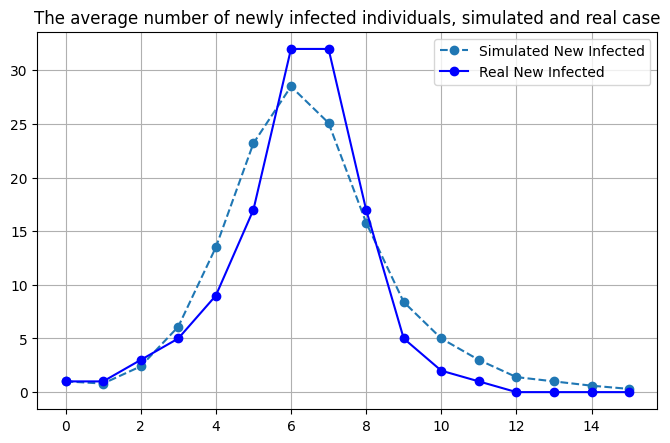

In [46]:
#Plot the comparision between the single istance, real infected and the simulated ones

#Simulated
simulated_n_inf = mean_solutions[4]

#Real
real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0,0]

fig = plt.figure(figsize=(8,5), dpi=100)

plt.plot(range(16),simulated_n_inf, marker='o', 
        linestyle = '--', label ='Simulated New Infected')
plt.plot(range(16),real_n_inf, marker='o', 
         color='b', label ='Real New Infected')

plt.legend()
plt.grid(True)
plt.title("The average number of newly infected individuals, simulated and real case")
plt.show()

##**5. Challenge (optional)**

Try to find a better random graph (i.e. one that does not use preferential attachment) to represent the network for the pandemic. Try to also find a better algorithm to estimate the parameters.


In [22]:
#For this optimization we try to see what results we got by implementing the 
#Erdos-Renyi model instead of the attachement used in point 1.2

from scipy import special

def create_Erdos_Renyi(n, k):
  prob = (n*k)/(special.binom(n,2))
  G = nx.erdos_renyi_graph(n, prob, directed=False)
  return G

In [23]:
n = 934 #population
N = 10 
n_weeks = 15
n_infected = 1

vac_list_cumulative = [5,9,16,24,32,40,47,54,59,60,60,60,60,60,60,60]
vac_list_weeks = [vac_list_cumulative[i] if i == 0 else vac_list_cumulative[i] - vac_list_cumulative[i-1]  for i in range(0, n_weeks)]
#vac_list = [5, 4, 7, 8, 8, 8, 7, 7, 5, 1, 0, 0, 0, 0, 0, 0]

real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0]

#initial parameters:
k_0 = 10
beta_0 = 0.3
rho_0 = 0.6
delta_k_0 = 1
delta_beta_0 = 0.1
delta_rho_0 = 0.1

#To have a more relaiable estimate I compute n_grid_search times the estimate
#and then make the average to obtain the average best parameters k, beta, rho
n_grid_search = 10

print(f"Simulate the gradient-based search over the parameter space of  k, β and ρ for {n_grid_search} times.\nThe best k, β and ρ will be the average of the values found at each step.")
print("")

solutions_opt = []
for i in range(n_grid_search):
  print(f"Values found at step {i}:")
  print("")
  solutions_opt.append(grad_search(n, N, n_weeks, vac_list_weeks, real_n_inf, k_0, beta_0, rho_0, delta_k_0, delta_beta_0, delta_rho_0, optional = True))
  print("")

Simulate the gradient-based search over the parameter space of  k, β and ρ for 10 times.
The best k, β and ρ will be the average of the values found at each step.

Values found at step 0:

Parameters remained invaried.
Best combination: k = 9, beta = 0.12, rho = 0.74 with loss = 4.123105625617661

Values found at step 1:

Loss increased, previous combination was preferable.
Best combination: k = 9, beta = 0.14, rho = 0.75 with loss = 4.442221666388715

Values found at step 2:

Loss increased, previous combination was preferable.
Best combination: k = 9, beta = 0.13, rho = 0.79 with loss = 4.016632088371218

Values found at step 3:

Loss increased, previous combination was preferable.
Best combination: k = 9, beta = 0.14, rho = 0.78 with loss = 4.09878030638384

Values found at step 4:

Loss increased, previous combination was preferable.
Best combination: k = 9, beta = 0.14, rho = 0.54 with loss = 4.575295983139597

Values found at step 5:

Loss increased, previous combination was pref

In [24]:
#Show the averages of the best parameters we got
mean_solutions_opt = np.mean(solutions_opt, axis = 0, dtype = object)
mean_solutions_opt

array([9.0, 0.13937499999999997, 0.7253124999999999, 4.312951482021257,
       array([ 1. ,  1.5,  4.1,  7.8, 14.4, 22.4, 26.2, 26. , 17.5, 11.2,  7.2,
        4.9,  3.4,  2.5,  2. ,  1.4])], dtype=object)

In [55]:
#We take as best parameters the average of best parameters found at each step
#of the grad_search function

best_k_opt = int(mean_solutions_opt[0])
best_beta_opt = mean_solutions_opt[1]
best_rho_opt = mean_solutions_opt[2]
best_loss_opt = mean_solutions_opt[3]

print('Best RMSE found: ',best_loss_opt)

Best RMSE found:  4.312951482021257


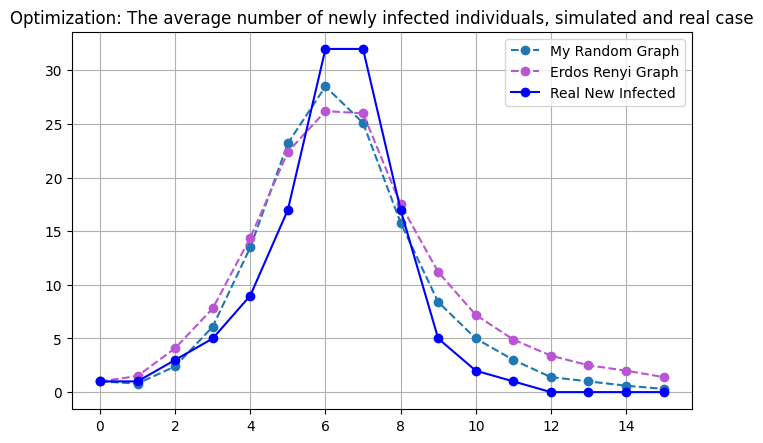

In [62]:
#Plot the comparision between the average of newly infected with my original
#random graph, Erdos Renyi graph and real infected

#Simulated opt
simulated_n_inf_opt = mean_solutions_opt[4]

#Real
real_n_inf = [1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0,0]

#Plot 
fig = plt.figure(figsize=(8,5), dpi=100)

plt.plot(range(16),simulated_n_inf, marker='o', 
        linestyle = '--', label ='My Random Graph')
plt.plot(range(16),simulated_n_inf_opt, marker='o', 
        linestyle = '--', color = 'mediumorchid', label ='Erdos Renyi Graph')
plt.plot(range(16),real_n_inf, marker='o', 
         color='b', label ='Real New Infected')
plt.legend()
plt.grid(True)
plt.title("Optimization: The average number of newly infected individuals, simulated and real case")
plt.show()